![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [40]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [41]:
penguins_df.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [42]:
dummies= pd.get_dummies(penguins_df['sex'])
pg_df = pd.concat([dummies,penguins_df],axis=1)
pg_df.drop('sex',axis=1,inplace=True)
pg_df.head()

,FEMALE,MALE,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,0,1,39.1,18.7,181.0,3750.0
1,1,0,39.5,17.4,186.0,3800.0
2,1,0,40.3,18.0,195.0,3250.0
3,1,0,36.7,19.3,193.0,3450.0
4,0,1,39.3,20.6,190.0,3650.0


In [43]:
scaler = StandardScaler()
X = scaler.fit_transform(pg_df)
pg_processed = pd.DataFrame(data=X,columns=pg_df.columns)
pg_processed.head()

,FEMALE,MALE,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,-0.993994,0.993994,-0.903906,0.790360,-1.425342,-0.566948
1,1.006042,-1.006042,-0.830434,0.126187,-1.068577,-0.504847
2,1.006042,-1.006042,-0.683490,0.432728,-0.426399,-1.187953
3,1.006042,-1.006042,-1.344738,1.096901,-0.569105,-0.939551
4,-0.993994,0.993994,-0.867170,1.761074,-0.783164,-0.691149


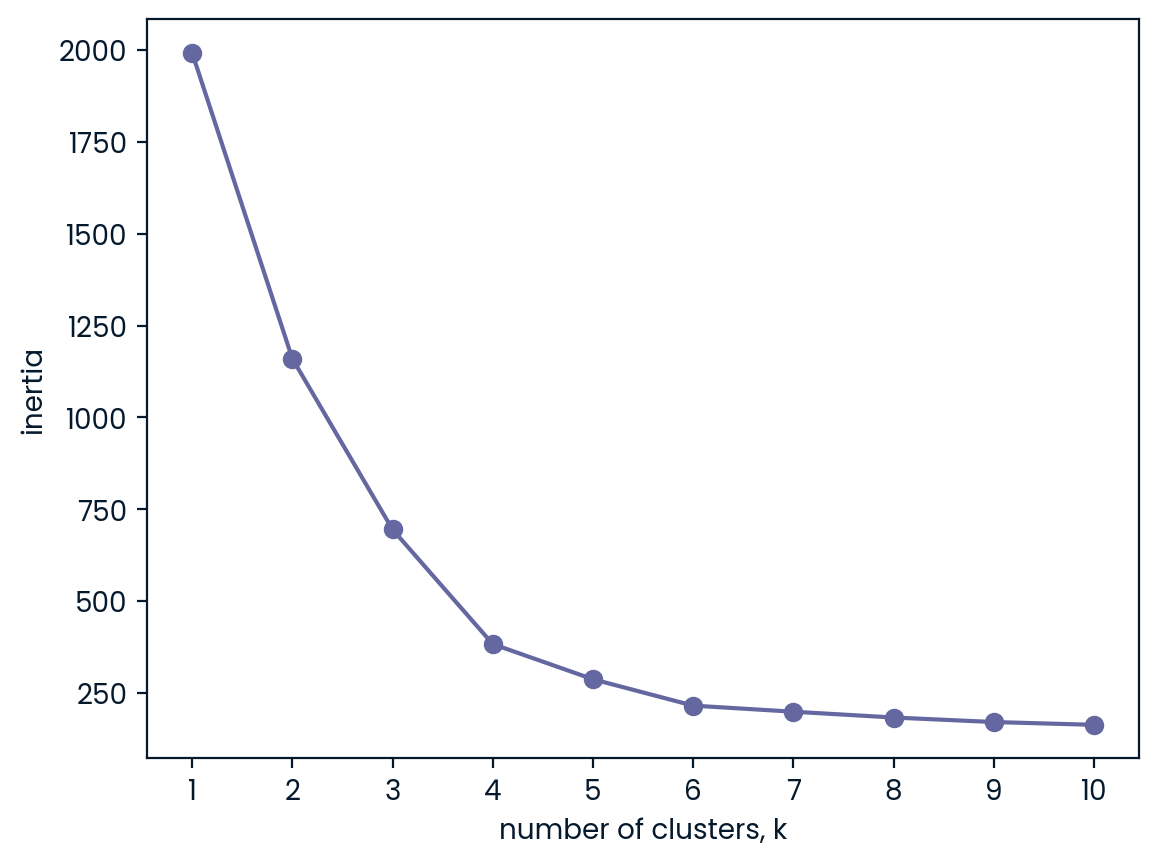

In [44]:
ks = range(1, 11)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    kMeans = KMeans(n_clusters = k,random_state= 36).fit(pg_processed)
    
    # Append the inertia to the list of inertias
    inertias.append(kMeans.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [45]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=36).fit(pg_processed)
penguins_df['label'] = kmeans.labels_

# Assign the cluster centers: centroids
centroids = kmeans.cluster_centers_

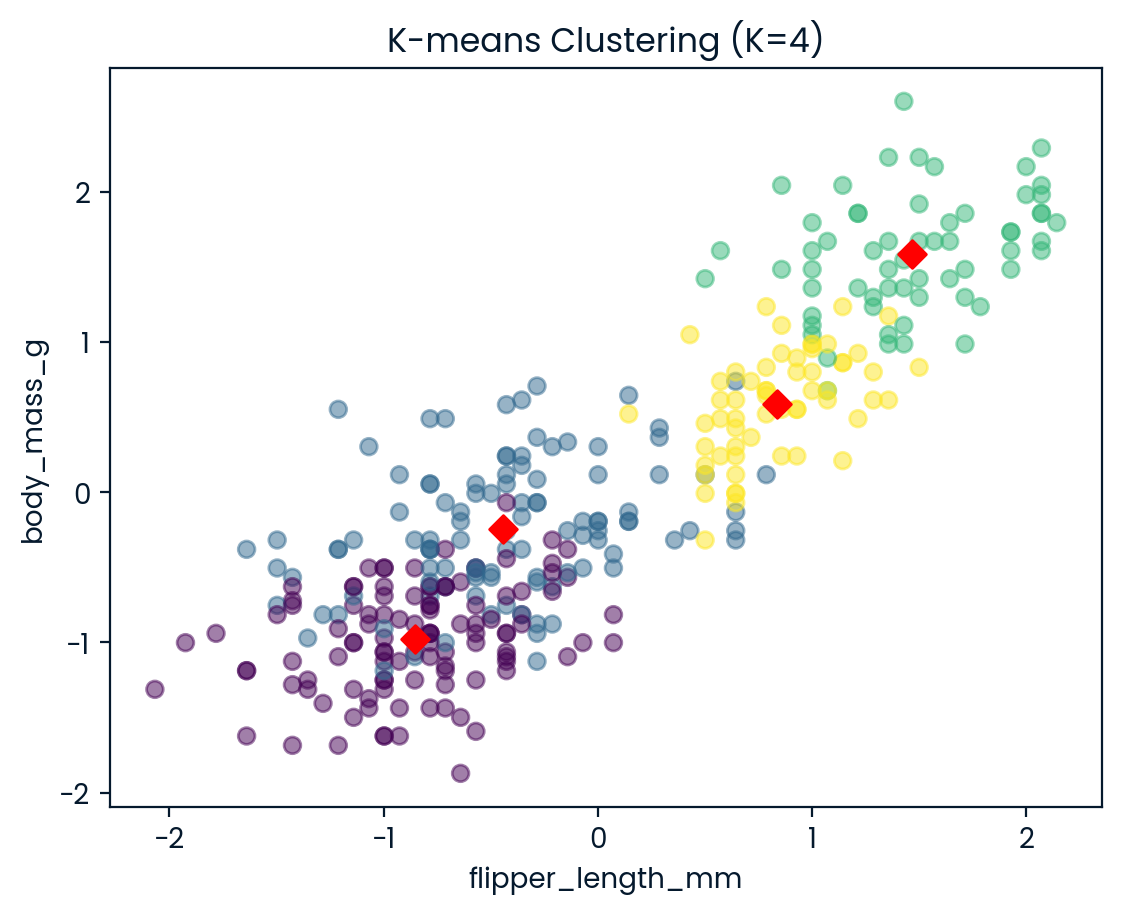

In [46]:
# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:, pg_processed.columns.get_loc('flipper_length_mm')]
centroids_y = centroids[:, pg_processed.columns.get_loc('body_mass_g')]

# Make a scatter plot of data points
plt.scatter(pg_processed['flipper_length_mm'], pg_processed['body_mass_g'], c=kmeans.labels_, cmap='viridis', alpha=0.5)

# Plot the centroids
plt.scatter(centroids_x, centroids_y, marker='D', s=50, color='red')

plt.xlabel('flipper_length_mm')
plt.ylabel('body_mass_g')
plt.title(f'K-means Clustering (K={n_clusters})')
plt.show()

In [47]:
stat_penguins = penguins_df.groupby('label').mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
label,,,,
0,40.217757,17.611215,189.046729,3419.158879
1,43.878302,19.111321,194.764151,4006.603774
2,49.473770,15.718033,221.540984,5484.836066
3,45.563793,14.237931,212.706897,4679.741379
